In [5]:
import requests
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
from tqdm import tqdm
sys.path.append("/home/nuwandavek/Documents/rocketship/scanpix/")

from ml.helpers import get_image_from_url

# Create index for the images

In [6]:
BASEURL = "http://0.0.0.0:5001/process_image"
IMG_PATH = "../data/images/"
imgs = [x for x in os.listdir(IMG_PATH) if x.split('.')[-1] in ['jpg', 'png', 'jpeg']]
img_index = []
for img in tqdm(imgs):
    res = requests.get(url=f"{BASEURL}", params={'url': f"{IMG_PATH}/{img}"}).json()
    res['file_name'] = img
    img_index.append(res)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.38it/s]


In [7]:
OUTPUT_PATH = "../data/"
with open(f'{OUTPUT_PATH}/index2.json', 'w', encoding='utf-8') as f:
    json.dump(img_index, f, indent=4)

# Query with a prompt

In [58]:
def plot_results(res, query, cols=5):
    cols = min(cols, len(res))
    plt.figure(figsize=(20, 6))
    rows = int(np.ceil(len(res) / cols))
    for r, result in enumerate(res):
        plt.subplot(rows, cols, r+1)
        plt.imshow(get_image_from_url(f"{IMG_PATH}/{result[0]}"))
        plt.title(f"{result[0]}: {np.round(result[1], 2)}")
    plt.suptitle(f"query: {query}")
    plt.show()

In [59]:
BASEURL = "http://0.0.0.0:5001/process_text"

with open(f'{OUTPUT_PATH}/index.json', 'r') as fob:
    img_index = json.load(fob)

In [70]:
query = "a bicycle with two wheels"
res = requests.get(url=f"{BASEURL}", params={'text': query}).json()
text_embedding = res['clip_embedding']
result = []
for index in img_index:
    result.append((index['file_name'], np.dot(text_embedding, index['clip_embedding'])))

result

[('pug.jpg', 0.1435117076795353), ('bicycle.jpeg', 0.2433806454008346)]

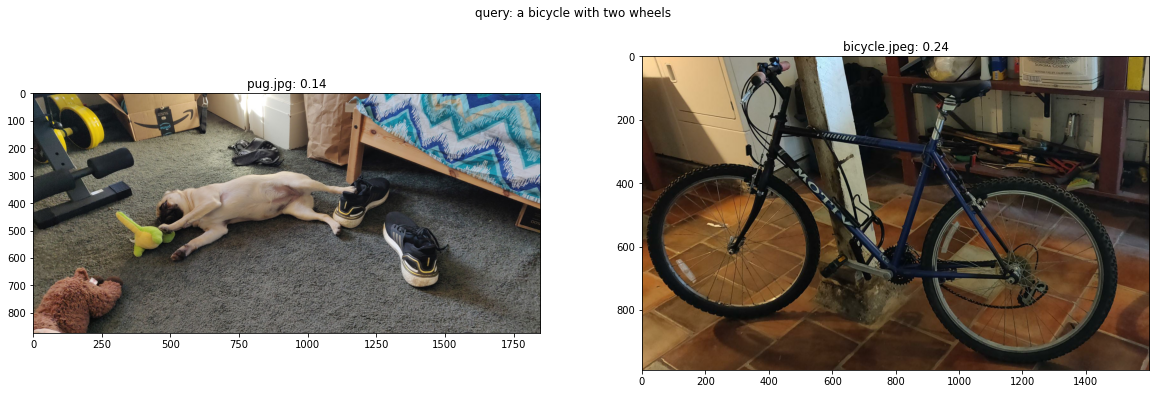

In [71]:
plot_results(result, query)